# Redoing analysis without detrending

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
import matplotlib.dates as mdates
from datetime import datetime

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
date_fmt = mdates.DateFormatter('%m/%d')
date_initial = mdates.date2num(datetime.strptime('2018-05-01','%Y-%m-%d'))
date_final = mdates.date2num(datetime.strptime('2018-08-15','%Y-%m-%d'))
date_eruption = mdates.date2num(datetime.strptime('2018-05-04','%Y-%m-%d'))
date_eruption_end = mdates.date2num(datetime.strptime('2018-08-04','%Y-%m-%d'))
date_explosion1 = mdates.date2num(datetime.strptime('2018-05-16','%Y-%m-%d'))
date_explosion2 = mdates.date2num(datetime.strptime('2018-05-26','%Y-%m-%d'))
date_intensity_eruption = mdates.date2num(datetime.strptime('2018-05-18','%Y-%m-%d'))
date_caldera_start = mdates.date2num(datetime.strptime('2018-05-26','%Y-%m-%d'))
date_caldera_end = mdates.date2num(datetime.strptime('2018-08-02','%Y-%m-%d'))
date_caldera_broad = mdates.date2num(datetime.strptime('2018-06-20','%Y-%m-%d'))

pathgg = '/Users/aroman/work/kilauea_2018/'
A = np.loadtxt(pathgg + 'tilt.txt')
month_tilt = A[:,1]
time_tilt = A[:,0]
month_tilt = A[:,1]
day_tilt = A[:,2]
hour_tilt = A[:,4]
minute_tilt = A[:,5]
tilt = A[:,6]
date_tilt = []
for i in range(len(day_tilt)):
    date_tilt.append('2018' + '-' + str(int(month_tilt[i])) + '-' + str(int(day_tilt[i])) + ' ' + str(int(hour_tilt[i])) + ':' + str(int(minute_tilt[i])) + ':' + '00')
date_obj = [datetime.strptime(date,'%Y-%m-%d %H:%M:%S') for date in date_tilt]
dates = mdates.date2num(date_obj)
fig1, ax1 = plt.subplots(nrows =  2, ncols = 1, figsize = (14,6))

ax1[0].axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
ax1[0].axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
ax1[0].plot(dates,tilt)
ax1[0].xaxis.set_major_formatter(date_fmt)
ax1[0].xaxis.set_major_locator(months)
ax1[0].xaxis.set_minor_locator(days)
ax1[0].set_xlim([date_initial,date_final])
ax1[0].axvline(x=date_eruption,color = 'k')
ax1[0].axvline(x=date_eruption_end,color = 'k')
ax1[0].axvline(x=date_caldera_broad,color = 'c')
b, a = signal.butter(2, 0.03)
tilt_filt = signal.filtfilt(b, a, tilt)
ax1[1].axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
ax1[1].axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
ax1[1].plot(dates,tilt_filt)
ax1[1].xaxis.set_major_formatter(date_fmt)
ax1[1].xaxis.set_major_locator(months)
ax1[1].xaxis.set_minor_locator(days)
ax1[1].set_xlim([date_initial,date_final])
ax1[1].axvline(x=date_eruption,color = 'k')
ax1[1].axvline(x=date_eruption_end,color = 'k')
ax1[1].axvline(x=date_caldera_broad,color = 'c')

(57, 57)

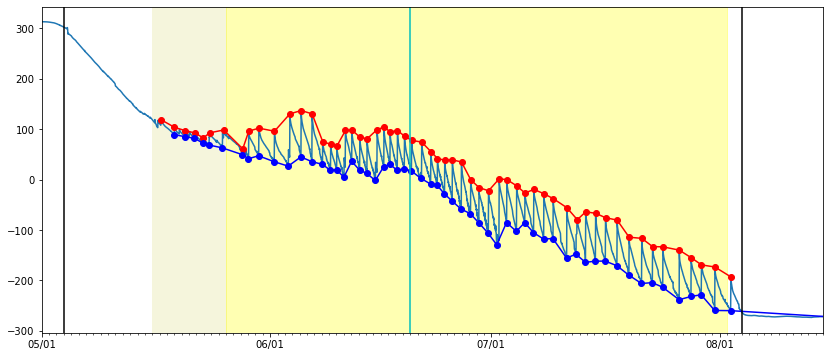

In [2]:
ind, _ = signal.find_peaks(tilt_filt,distance=500,prominence=10)
time_peaks = dates[ind]
peaks = tilt_filt[ind]
min_peaks = []
time_min_peaks = []
for i in range(len(ind)-1):
    y = tilt_filt[ind[i]:ind[i+1]]
    x = dates[ind[i]:ind[i+1]]
    minimum = np.min(y)
    min_peaks.append(minimum)
    time_min_peaks.append(x[np.where(y==minimum)][0])
y = tilt_filt[ind[-1]:]
x = dates[ind[-1]:]
minimum = np.min(y)
min_peaks.append(minimum)
time_min_peaks.append(x[np.where(y==minimum)][0])
fig1, ax = plt.subplots(nrows =  1, ncols = 1, figsize = (14,6))
ax.axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
ax.axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
ax.plot(dates,tilt_filt)
ax.plot(time_peaks,peaks,'ro-')
ax.plot(time_min_peaks,min_peaks,'bo-')
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
ax.set_xlim([date_initial,date_final])
ax.axvline(x=date_eruption,color = 'k')
ax.axvline(x=date_eruption_end,color = 'k')
ax.axvline(x=date_caldera_broad,color = 'c')

peaks = np.array(peaks[:-1])
min_peaks =np.array(min_peaks[:-1])
time_min_peaks = np.array(time_min_peaks[:-1])
time_peaks = np.array(time_peaks[:-1])

len(peaks),len(min_peaks)

Text(0, 0.5, 'dt stick [days]]')

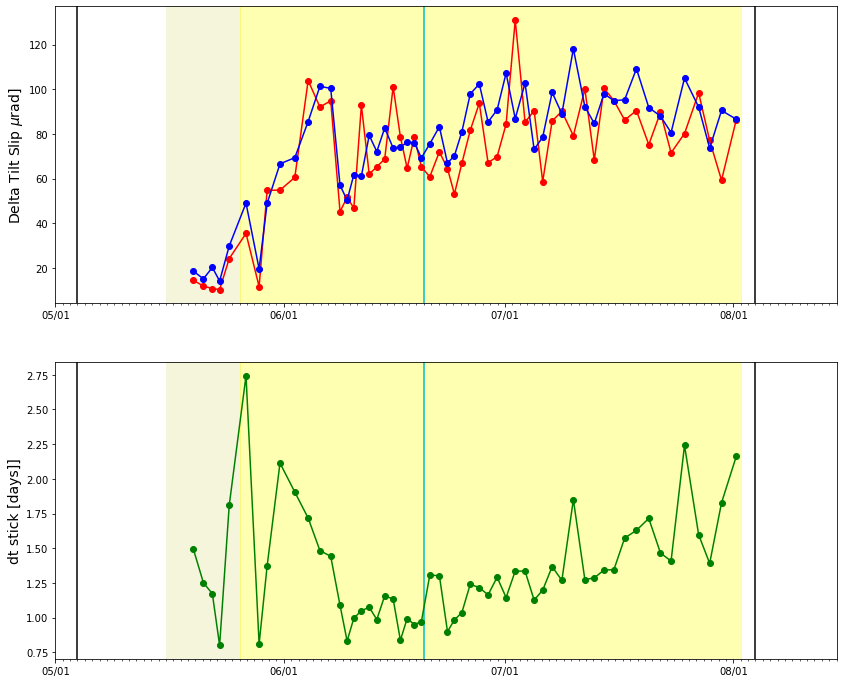

In [3]:
amp_stick =[]
amp_slip = []
time_average_peaks = []
dt_peaks = []
for i in range(1,len(peaks)):
    amp_slip.append(peaks[i] - min_peaks[i-1])
    amp_stick.append(peaks[i] - min_peaks[i])
    time_average_peaks.append(0.5 * (time_min_peaks[i-1] + time_min_peaks[i]))
    dt_peaks.append(time_min_peaks[i] - time_min_peaks[i-1])

amp_stick = np.array(amp_stick)
amp_slip = np.array(amp_slip)
dt_peaks = np.array(dt_peaks)
time_average_peaks = np.array(time_average_peaks)
fig1, ax = plt.subplots(nrows =  2, ncols = 1, figsize = (14,12))
for i in range(0,len(ax)):
    ax[i].axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
    ax[i].axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
    ax[i].xaxis.set_major_formatter(date_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_minor_locator(days)
    ax[i].set_xlim([date_initial,date_final])
    ax[i].axvline(x=date_eruption,color = 'k')
    ax[i].axvline(x=date_eruption_end,color = 'k')
    ax[i].axvline(x=date_caldera_broad,color = 'c')
ax[0].plot(time_average_peaks,amp_slip,'ro-')
ax[0].set_ylabel('Delta Tilt Slip $\mu$rad]',fontsize= 14)
ax[0].plot(time_average_peaks,amp_stick,'bo-')
ax[1].set_ylabel('Delta Tilt Stick $\mu$rad]',fontsize= 14)
ax[1].plot(time_average_peaks,dt_peaks,'go-')
ax[1].set_ylabel('dt stick [days]]',fontsize= 14)



In [4]:
import csv
from scipy.interpolate import interp1d
def read_csv(filename):
  
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        A = []
        for row in readCSV:
            A.append(row)
    return A

def format_gps(A):
    A = A[5:]
    t = []
    d = []
    uz = []
    for i in A:
        t.append(float(i[0]))
        d.append(i[1])
        uz.append(float(i[2])) 
    t = np.array(t)
    uz = np.array(uz)
    return t,d,uz
gps_file = 'CALS.csv'
data = read_csv(pathgg + gps_file)
time,date_gps,disp = format_gps(data)
disp = abs(disp - disp[0])
date_obj = [datetime.strptime(date,'%Y-%m-%d %H:%M:%S').date() for date in date_gps]
dates_gps = mdates.date2num(date_obj)
f = interp1d(dates_gps, disp)
indexes = time_average_peaks > np.min(dates_gps) 
time_average_peaks = time_average_peaks[indexes]
dt_peaks = dt_peaks[indexes]
disp_interp = f(time_average_peaks)
plt.plot(disp_interp,dt_peaks)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aroman/work/kilauea_2018/CALS.csv'

In [ ]:
a = np.linspace(0,10)
index = time_average_peaks > time_average_peaks[50]

In [5]:
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
path_figs = 'figs/'
model_ERZ = LinearRegression()
model_summit = LinearRegression()


A = np.loadtxt('volumes.txt')
summit = A[0:4,:]
ERZ = A[4:,:]
t_summit = summit[:,0]
t_summit = date_initial - 1 + t_summit
vol_summit = -summit[:,1]/1e+9
eb_summit = summit[:,2]
t_ERZ = ERZ[:,0]
t_ERZ = date_initial - 1 + t_ERZ
vol_ERZ = ERZ[:,1]/1e+9
t_ERZ = t_ERZ.reshape(-1,1)
t_summit = t_summit.reshape(-1,1)

vol_ERZ = vol_ERZ.reshape(-1,1)
vol_summit = vol_summit.reshape(-1,1)

model_ERZ.fit(t_ERZ, vol_ERZ)
model_summit.fit(t_summit, vol_summit)

tfit = np.linspace(date_initial+3,t_ERZ[-1][0])
vol_ERZ_fit = model_ERZ.predict(tfit[:, np.newaxis])
vol_summit_fit = model_summit.predict(tfit[:, np.newaxis])
mpl.style.use('dark_background')
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14,12))
ax[0].plot(t_summit,vol_summit - vol_summit_fit[0],'bo',markersize = 10,linewidth = 3 )
ax[0].plot(t_ERZ,vol_ERZ - vol_ERZ_fit[0],'ro',markersize = 10,linewidth = 3 )
ax[0].plot(tfit,vol_ERZ_fit - vol_ERZ_fit[0],'r',linewidth = 2)
ax[0].plot(tfit,vol_summit_fit - vol_summit_fit[0],'b',linewidth = 2)
ax[0].legend(['Summit caldera','Land lavas'],fontsize= 18,loc = (0.1,0.8))
ax[0].set_ylabel('Volumes [km$^3$]',fontsize= 22)
ax[0].set_ylim([-0.01,1.3])
ax[0].xaxis.set_major_formatter(date_fmt)
ax[0].xaxis.set_major_locator(months)
ax[0].xaxis.set_minor_locator(days)
ax[0].axvline(x=date_eruption,color = 'white')
ax[0].axvline(x=date_eruption_end,color = 'white')
ax[0].set_xlim([date_initial,date_final])
ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)

flux = model_summit.coef_/(3600*24)*1e+9
ax[1].axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
ax[1].axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
ax[1].plot(dates,tilt_filt,linewidth = 2)
ax[1].xaxis.set_major_formatter(date_fmt)
ax[1].xaxis.set_major_locator(months)
ax[1].xaxis.set_minor_locator(days)
ax[1].set_xlim([date_initial,date_final])
ax[1].axvline(x=date_eruption,color = 'white')
ax[1].axvline(x=date_eruption_end,color = 'white')
ax[1].set_xlabel('Time [Date]',fontsize = 22)
ax[1].set_ylabel('Tilt [$\mu$rad]',fontsize = 22)
ax[1].set_xlim([date_initial,date_final])
ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)

plt.savefig(path_figs + 'test_dark.pdf')
plt.savefig(path_figs + 'test_dark.svg')
flux


ModuleNotFoundError: No module named 'sklearn'

In [6]:
a

array([ 1.        , -1.86689228,  0.87521455])

In [7]:
import matplotlib as mpl
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
path_figs = 'figs/'
model_ERZ = LinearRegression()
model_summit = LinearRegression()


A = np.loadtxt('volumes.txt')
summit = A[0:4,:]
ERZ = A[4:,:]
t_summit = summit[:,0]
t_summit = date_initial - 1 + t_summit
vol_summit = -summit[:,1]/1e+9
eb_summit = summit[:,2]
t_ERZ = ERZ[:,0]
t_ERZ = date_initial - 1 + t_ERZ
vol_ERZ = ERZ[:,1]/1e+9
t_ERZ = t_ERZ.reshape(-1,1)
t_summit = t_summit.reshape(-1,1)

vol_ERZ = vol_ERZ.reshape(-1,1)
vol_summit = vol_summit.reshape(-1,1)

model_ERZ.fit(t_ERZ, vol_ERZ)
model_summit.fit(t_summit, vol_summit)

tfit = np.linspace(date_initial+3,t_ERZ[-1][0])
vol_ERZ_fit = model_ERZ.predict(tfit[:, np.newaxis])
vol_summit_fit = model_summit.predict(tfit[:, np.newaxis])
mpl.style.use('dark_background')
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14,12))
ax[0].plot(t_summit,vol_summit,'bo',markersize = 10,linewidth = 3 )
ax[0].plot(t_ERZ,vol_ERZ ,'ro',markersize = 10,linewidth = 3 )
#ax[0].plot(tfit,vol_ERZ_fit - vol_ERZ_fit[0],'r',linewidth = 2)
#ax[0].plot(tfit,vol_summit_fit - vol_summit_fit[0],'b',linewidth = 2)
ax[0].legend(['Summit caldera','Land lavas'],fontsize= 18,loc = (0.1,0.8))
ax[0].set_ylabel('Volumes [km$^3$]',fontsize= 22)
ax[0].set_ylim([-0.01,1.3])
ax[0].xaxis.set_major_formatter(date_fmt)
ax[0].xaxis.set_major_locator(months)
ax[0].xaxis.set_minor_locator(days)
ax[0].axvline(x=date_eruption,color = 'white')
ax[0].axvline(x=date_eruption_end,color = 'white')
ax[0].set_xlim([date_initial,date_final])
ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)

flux = model_summit.coef_/(3600*24)*1e+9
ax[1].axvspan(date_explosion1,date_explosion2,alpha = 1.0,color = 'beige')
ax[1].axvspan(date_caldera_start,date_caldera_end,alpha = 0.3,color = 'yellow')
ax[1].plot(dates,tilt_filt,linewidth = 2)
ax[1].xaxis.set_major_formatter(date_fmt)
ax[1].xaxis.set_major_locator(months)
ax[1].xaxis.set_minor_locator(days)
ax[1].set_xlim([date_initial,date_final])
ax[1].axvline(x=date_eruption,color = 'white')
ax[1].axvline(x=date_eruption_end,color = 'white')
ax[1].set_xlabel('Time [Date]',fontsize = 22)
ax[1].set_ylabel('Tilt [$\mu$rad]',fontsize = 22)
ax[1].set_xlim([date_initial,date_final])
ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)

plt.savefig(path_figs + 'test_dark.pdf')
plt.savefig(path_figs + 'test_dark.svg')
flux


ModuleNotFoundError: No module named 'sklearn'